<h1>Minimal example with TensorFlow 2.0</h1>

In this notebook we will recreate our machine learning algorithm using TF 2.0.

<h2>Import the relevant libraries</h2>

In [3]:
import matplotlib.pyplot
import tensorflow
import numpy

<h2>Data generation</h2>

In [4]:
observations: int = 1000

xs: numpy.ndarray = numpy.random.uniform(low=-10, high=10,size=(observations, 1))
zs: numpy.ndarray = numpy.random.uniform(low=-10, high=10,size=(observations, 1))
    
generated_inputs: numpy.ndarray = numpy.column_stack((xs,zs))
    
noise: numpy.ndarray = numpy.random.uniform(low=-1, high=1, size=(observations, 1))
    
generated_targets: numpy.ndarray = 2*xs - 3*zs + 5 + noise

numpy.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

<h2>Solving with TensorFlow</h2>

In [6]:
training_data: numpy.ndarray = numpy.load('TF_intro.npz')

In [36]:
input_size: int = 2
output_size: int = 1
    
model: tensorflow.keras.models.Sequential = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(output_size,
                                  kernel_initializer=tensorflow.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                  bias_initializer=tensorflow.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                 )
])
    
custom_optimizer: tensorflow.keras.optimizers.SGD = tensorflow.keras.optimizers.SGD(learning_rate=0.02)
    
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)

<h2>Extract the weights and bias</h2>

In [38]:
model.layers[0].get_weights()

[array([[ 1.9868625],
        [-2.9956877]], dtype=float32),
 array([4.991829], dtype=float32)]

In [39]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9868625],
       [-2.9956877]], dtype=float32)

In [40]:
bias = model.layers[0].get_weights()[1]
bias

array([4.991829], dtype=float32)

<h2>Extract the outputs (make predictions)</h2>

In [41]:
model.predict_on_batch(training_data['inputs'])

array([[-10.873981  ],
       [ 23.608181  ],
       [ 19.450615  ],
       [ -9.949631  ],
       [ -7.2954664 ],
       [ 10.980207  ],
       [ 35.7283    ],
       [ 42.84032   ],
       [ 10.860559  ],
       [ 34.203964  ],
       [ 28.006315  ],
       [-31.634262  ],
       [ 28.593111  ],
       [-25.372078  ],
       [ -7.4550076 ],
       [  6.839884  ],
       [ 18.658066  ],
       [ 23.528715  ],
       [-21.65821   ],
       [ 29.2355    ],
       [-16.984564  ],
       [ 30.014753  ],
       [ -5.6497555 ],
       [-18.98261   ],
       [ 24.702942  ],
       [  0.7927542 ],
       [ -7.843439  ],
       [ 14.427309  ],
       [ 17.718481  ],
       [ 26.12107   ],
       [ 15.431412  ],
       [  5.9518948 ],
       [ 24.254227  ],
       [ 33.05963   ],
       [ 12.059356  ],
       [-24.390236  ],
       [ -4.57425   ],
       [ 30.017258  ],
       [ 12.381306  ],
       [ 31.058094  ],
       [  5.2499657 ],
       [-17.381828  ],
       [ 30.861927  ],
       [ 10

In [24]:
training_data['targets'].round(1)

array([[-10.4],
       [ 22.9],
       [ 18.7],
       [-10.6],
       [ -8.1],
       [ 11. ],
       [ 36.8],
       [ 42.1],
       [ 10.3],
       [ 34.5],
       [ 27.7],
       [-32.7],
       [ 28.9],
       [-24.7],
       [ -7.8],
       [  6.4],
       [ 18.1],
       [ 23.7],
       [-22.2],
       [ 28.4],
       [-17. ],
       [ 29.6],
       [ -5.1],
       [-19.3],
       [ 24.8],
       [  0.3],
       [ -8. ],
       [ 14.9],
       [ 17.8],
       [ 26.2],
       [ 16.4],
       [  5.6],
       [ 23.8],
       [ 33.6],
       [ 12. ],
       [-23.8],
       [ -4.7],
       [ 30.6],
       [ 12. ],
       [ 30.1],
       [  5.7],
       [-16.5],
       [ 31.9],
       [  9.3],
       [ 10. ],
       [ 35.9],
       [ -0.4],
       [ 13. ],
       [ 31.8],
       [  1.7],
       [ 36.1],
       [-22.1],
       [ 10.5],
       [ 17.8],
       [ 15. ],
       [ 32.2],
       [ 11. ],
       [  1.1],
       [-27.8],
       [ -4. ],
       [  5.3],
       [-16.6],
       [

<h2>Plotting the data</h2>

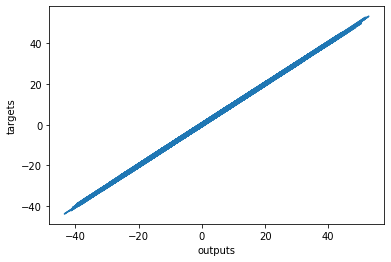

In [37]:
matplotlib.pyplot.plot(numpy.squeeze(model.predict_on_batch(training_data['inputs'])), numpy.squeeze(training_data['targets']))
matplotlib.pyplot.xlabel('outputs')
matplotlib.pyplot.ylabel('targets')
matplotlib.pyplot.show()